In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('data/articles_handlabeled_v2_cleaned.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter articles from the year 2012
articles_2012 = df[df['date'].dt.year == 2012]

# Print the first few rows of the filtered dataset
print(articles_2012.head())

# Now you have a DataFrame containing only articles from 2012

                                              summary       date  \
20  The article discusses the attack on two trader... 2012-01-12   
21  The article discusses a fire that destroyed 18... 2012-01-25   
22  The article discusses ethnic clashes in Mayend... 2012-01-29   
23  The article discusses the discovery of petrole... 2012-02-06   
24  The article discusses the governor of Unity St... 2012-02-04   

                               chat_GPT_location       lat        lng  \
20  Rubkuay payam, Mayiandit county, Unity state  8.723687  30.164704   
21                               Rubkotna county  9.329746  29.696268   
22                               Mayendit County  8.723687  30.164704   
23                                   Unity State  8.927721  29.788925   
24                                        Bentiu  9.231487  29.800503   

    article_id cd_district_name  hunger_bert  refugees_bert  \
20        1874             Koch         True           True   
21        2074          Ru

In [2]:
import pandas as pd
import spacy
from collections import Counter
from spacy import displacy
import matplotlib.pyplot as plt
#from spacy.pipeline import EntityRuler

# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Define a function to extract organizations from text
def extract_organizations(text):
    doc = nlp(text)
    organizations = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return organizations

# Initialize a counter to count organization mentions
org_counter = Counter()

# Process and count organizations in each article
for index, row in articles_2012.iterrows():
    organizations = extract_organizations(row['summary'])
    org_counter.update(organizations)

# Find the most common organization mentioned
most_common_org, count = org_counter.most_common(1)[0]

# Print the most common organization and its count
print(f"The most common organization in 2012 articles is: {most_common_org} ({count} mentions).")

ModuleNotFoundError: No module named 'spacy'

In [12]:
# Import necessary libraries
import pandas as pd
from collections import Counter
import string

all_summaries = " ".join(articles_2012['summary'])

# Split the text into words and make them lowercase
words = all_summaries.lower().split()

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
words = [word.translate(translator) for word in words]

# Define common English stopwords
stopwords = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

# Remove stopwords and words with length less than 3
filtered_words = [word for word in words if word not in stopwords and len(word) > 2]

# Count word frequency
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(30)

# Print the most common words
for word, count in most_common_words:
    print(f"{word}: {count}")

sudan: 124
south: 102
article: 63
state: 46
discusses: 44
unity: 44
sudans: 28
sudanese: 22
also: 20
two: 15
states: 15
oil: 14
government: 14
bentiu: 13
border: 13
conflict: 12
forces: 12
military: 11
spla: 11
war: 11
peace: 11
civilians: 11
including: 9
khartoum: 9
bombing: 9
armed: 9
saf: 9
heglig: 9
ongoing: 8
international: 8


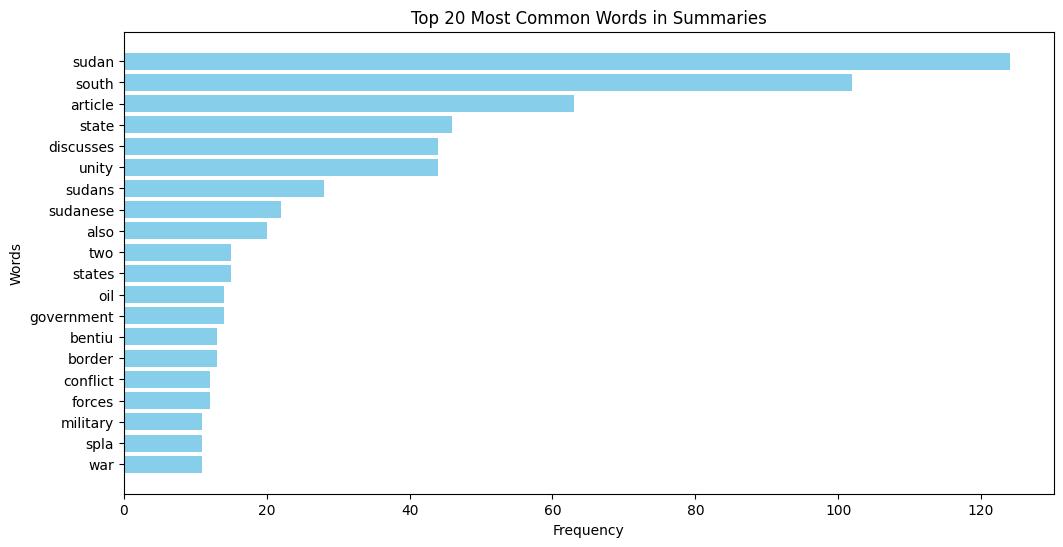

In [14]:
import matplotlib.pyplot as plt

# Extract the top N words and their counts (e.g., top 20 words)
top_words = most_common_words[:20]
words, counts = zip(*top_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Summaries')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()